In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

In [177]:
df_0 = pd.read_csv('bengaluru_house_prices.csv')

In [178]:
df_0

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [179]:
df_1 = df_0[['location', 'size', 'total_sqft', 'bath', 'price']]

In [180]:
df_1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [181]:
df_1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [182]:
df_2 = df_1.dropna()

In [183]:
df_2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [184]:
df_2.shape

(13246, 5)

In [185]:
df_1.shape[0] - df_2.shape[0]

74

In [186]:
df_2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [187]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [188]:
df_3 = df_2.copy()

In [189]:
df_3['bedroom'] = df_3['size'].apply(lambda x: int(x.split(' ')[0]))

In [190]:
df_3

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [191]:
df_3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [192]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [193]:
df_3[~(df_3['total_sqft'].apply(is_float))]

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


### Challenges

In [194]:
df_3[~(df_3['total_sqft'].apply(is_float))].sample(15)

,location,size,total_sqft,bath,price,bedroom
6832,Mysore Road,2 BHK,942 - 1117,2.0,50.855,2
8236,Budigere,1 BHK,664 - 722,1.0,27.375,1
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
7248,Hulimavu,2 BHK,132Sq. Yards,2.0,46.000,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
5179,Rachenahalli,1 BHK,660 - 700,1.0,32.640,1
5783,Sarjapur,4 Bedroom,2580 - 2591,4.0,139.500,4
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
10620,Old Madras Road,4 BHK,3630 - 3800,6.0,212.500,4
6552,5 Bedroom Farm House in Lakshmipura,5 Bedroom,24Guntha,6.0,550.000,5


In [195]:
def convert_range_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        avg = (float(tokens[0]) + float(tokens[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [196]:
df_4 = df_3.copy()

In [197]:
df_4['total_sqft'] = df_4['total_sqft'].apply(convert_range_to_float)

In [198]:
df_4.loc[[0, 30, 122]]

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
30,Yelahanka,4 BHK,2475.0,4.0,186.00,4
122,Hebbal,4 BHK,5611.5,4.0,477.00,4


In [199]:
df_4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bedroom        0
dtype: int64

In [200]:
df_5 = df_4.dropna()

In [201]:
df_5.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bedroom       0
dtype: int64

In [202]:
df_0.shape, df_1.shape, df_2.shape, df_3.shape, df_4.shape, df_5.shape

((13320, 9), (13320, 5), (13246, 5), (13246, 6), (13246, 6), (13200, 6))

In [203]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bedroom     13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [231]:
df_5['location'].value_counts()

location
Whitefield                         532
Sarjapur  Road                     392
Electronic City                    302
Kanakpura Road                     264
Thanisandra                        232
                                  ... 
beml layout, basaveshwara nagar      1
Sadhguru Layout                      1
Chikbasavanapura                     1
Electronic City Phase 1,             1
Chuchangatta Colony                  1
Name: count, Length: 1298, dtype: int64

In [221]:
location_counts = df_5['location'].value_counts() < 10

location
Whitefield                         False
Sarjapur  Road                     False
Electronic City                    False
Kanakpura Road                     False
Thanisandra                        False
                                   ...  
beml layout, basaveshwara nagar     True
Sadhguru Layout                     True
Chikbasavanapura                    True
Electronic City Phase 1,            True
Chuchangatta Colony                 True
Name: count, Length: 1298, dtype: bool

### Feature Engineering

In [204]:
df_6 = df_5.copy()

In [206]:
df_6['price_per_sqft'] = (df_6['price'] * 100000)/df_6['total_sqft']

In [207]:
df_6

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [212]:
dict(df_6['price_per_sqft'].describe())

{'count': np.float64(13200.0),
 'mean': np.float64(7920.759149939645),
 'std': np.float64(106727.15520931101),
 'min': np.float64(267.82981328435875),
 '25%': np.float64(4267.701345223347),
 '50%': np.float64(5438.331478242434),
 '75%': np.float64(7317.073170731707),
 'max': np.float64(12000000.0)}

### Come back for the quantile method when you are done

<Axes: xlabel='price_per_sqft', ylabel='Count'>

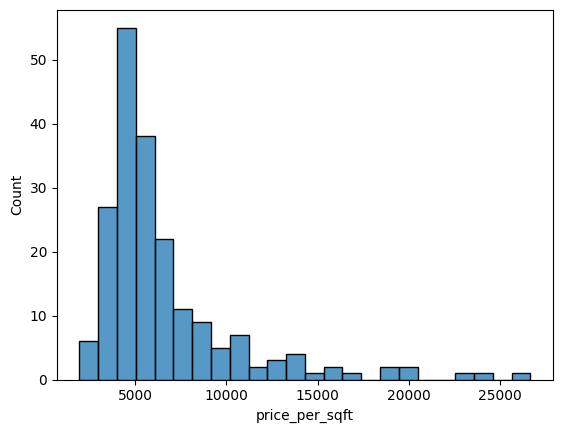

In [216]:
sns.histplot(df_6['price_per_sqft'].sample(200))